**Clean Air Race Pace of Previous Year**

In [1]:
pip install fastf1

In [2]:
import fastf1
import pandas as pd
import numpy as np
import requests

In [3]:
import os
if not os.path.exists("f1_cache"):
    os.makedirs("f1_cache")
fastf1.Cache.enable_cache("f1_cache")

**Season and Round to Predict**

In [4]:
# Season and Round to predict
SEASON_YEAR = 2025       # THe season you want to predict
PREDICTION_RACE_ROUND = 13     #The Round you want to predict
races_to_analyze = PREDICTION_RACE_ROUND - 1
SESSION_TYPE = 'R'
#Latitute and Longitude of Circuit of that Round
LAT = 52.3842
LON =4.5345
forecast_time = "2025-08-31 18:30:00"  # Example: 3 PM local time on race day
API_KEY = "6594950f08eba380bb8b8f0d44bb8f96" # !! REPLACE WITH YOUR ACTUAL API KEY from Weather Forcast !!


**Current Round Team Score**

In [5]:
# add constructor's data
team_points = {
    "McLaren": 559, "Mercedes": 236, "Red Bull": 194, "Williams": 70, "Ferrari": 260,
    "Haas": 35, "Aston Martin": 52, "Kick Sauber": 51, "Racing Bulls": 45, "Alpine": 20
}

**Last Year Season and Round for Clean Pace**

In [6]:
PREVIOUS_SEASON_YEAR = SEASON_YEAR - 1
PREVIOUS_RACE_ROUND = 14  # The season of that circuit previous year
session_type = 'R'

In [8]:
session_2024 = fastf1.get_session(PREVIOUS_SEASON_YEAR, PREVIOUS_RACE_ROUND, session_type)
session_2024.load()
laps_2024 = session_2024.laps[["Driver", "LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]].copy()
laps_2024.dropna(inplace=True)

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Belgian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:59:59.474' in Ergastresponse.
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app

In [9]:
# convert lap and sector times to seconds
for col in ["LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]:
    laps_2024[f"{col} (s)"] = laps_2024[col].dt.total_seconds()

# aggregate sector times by driver
sector_times_2024 = laps_2024.groupby("Driver").agg({
    "Sector1Time (s)": "mean",
    "Sector2Time (s)": "mean",
    "Sector3Time (s)": "mean"
}).reset_index()

sector_times_2024["TotalSectorTime (s)"] = (
    sector_times_2024["Sector1Time (s)"] +
    sector_times_2024["Sector2Time (s)"] +
    sector_times_2024["Sector3Time (s)"]
)


In [10]:
laps_2024.drop(columns=["Sector1Time", "Sector2Time", "Sector3Time"], inplace=True)
laps_2024

,Driver,LapTime,LapTime (s),Sector1Time (s),Sector2Time (s),Sector3Time (s)
1,HAM,0 days 00:01:49.849000,109.849,31.284,49.211,29.354
2,HAM,0 days 00:01:49.109000,109.109,31.215,48.486,29.408
3,HAM,0 days 00:01:49.808000,109.808,31.754,48.605,29.449
4,HAM,0 days 00:01:49.376000,109.376,31.592,48.320,29.464
5,HAM,0 days 00:01:49.400000,109.400,31.618,48.355,29.427
...,...,...,...,...,...,...
836,RUS,0 days 00:01:47.631000,107.631,30.989,47.555,29.087
837,RUS,0 days 00:01:47.754000,107.754,30.926,47.796,29.032
838,RUS,0 days 00:01:47.465000,107.465,31.014,47.525,28.926
839,RUS,0 days 00:01:47.301000,107.301,30.990,47.479,28.832


In [11]:
try:
    session = fastf1.get_session(PREVIOUS_SEASON_YEAR, PREVIOUS_RACE_ROUND, session_type)
    session.load()

    # Load the laps data
    laps = session.laps.copy()

    print(f"Successfully loaded data for the {session.event['EventName']} - {session_type} session.")
    display(laps.head())

except Exception as e:
    print(f"Error loading data: {e}")

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Belgian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:59:59.474' in Ergastresponse.
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app

Successfully loaded data for the Belgian Grand Prix - R session.


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:07.735000,HAM,44,0 days 00:01:52.700000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.406000,...,True,Mercedes,0 days 00:55:14.764000,2024-07-28 13:03:52.742,1,2.0,False,,False,False
1,0 days 00:58:57.584000,HAM,44,0 days 00:01:49.849000,2.0,1.0,NaT,NaT,0 days 00:00:31.284000,0 days 00:00:49.211000,...,True,Mercedes,0 days 00:57:07.735000,2024-07-28 13:05:45.713,1,2.0,False,,False,True
2,0 days 01:00:46.693000,HAM,44,0 days 00:01:49.109000,3.0,1.0,NaT,NaT,0 days 00:00:31.215000,0 days 00:00:48.486000,...,True,Mercedes,0 days 00:58:57.584000,2024-07-28 13:07:35.562,1,1.0,False,,False,True
3,0 days 01:02:36.501000,HAM,44,0 days 00:01:49.808000,4.0,1.0,NaT,NaT,0 days 00:00:31.754000,0 days 00:00:48.605000,...,True,Mercedes,0 days 01:00:46.693000,2024-07-28 13:09:24.671,1,1.0,False,,False,True
4,0 days 01:04:25.877000,HAM,44,0 days 00:01:49.376000,5.0,1.0,NaT,NaT,0 days 00:00:31.592000,0 days 00:00:48.320000,...,True,Mercedes,0 days 01:02:36.501000,2024-07-28 13:11:14.479,1,1.0,False,,False,True


In [12]:
# Step 3: Identify "clean air" laps
# Filter out unwanted laps (pit laps, safety car laps, etc.)
laps_clean = laps.loc[(laps["PitOutTime"].isnull() & laps["PitInTime"].isnull())].copy()
laps_clean.dropna(subset=["LapTime"], inplace=True)

# Calculate each driver's fastest lap to use as a reference
fastest_laps = laps_clean.groupby("Driver")["LapTime"].min().dt.total_seconds()

# Define a threshold for "clean air" laps (e.g., within 105% of the driver's fastest lap)
# This threshold can be adjusted based on the specific race and circuit characteristics
clean_air_threshold_factor = 1.05

clean_air_laps = pd.DataFrame()

for driver in laps_clean["Driver"].unique():
    driver_laps = laps_clean.loc[laps_clean["Driver"] == driver].copy()
    if driver in fastest_laps.index:
      fastest_lap_seconds = fastest_laps[driver]
      # Identify laps within the defined threshold of the fastest lap
      driver_clean_air_laps = driver_laps.loc[
          driver_laps["LapTime"].dt.total_seconds() <= fastest_lap_seconds * clean_air_threshold_factor
      ]
      clean_air_laps = pd.concat([clean_air_laps, driver_clean_air_laps])

# Step 4: Calculate average lap times for "clean air" laps
clean_air_race_pace_df = clean_air_laps.groupby("Driver")["LapTime"].mean().dt.total_seconds().reset_index()
clean_air_race_pace_df.rename(columns={"LapTime": "CleanAirRacePace (s)"}, inplace=True)

# Step 5: Store or display the results
clean_air_race_pace = clean_air_race_pace_df.set_index("Driver")["CleanAirRacePace (s)"].to_dict()

print("\nCalculated Clean Air Race Pace (in seconds):")
display(clean_air_race_pace_df)

clean_air_race_pace



Calculated Clean Air Race Pace (in seconds):


,Driver,CleanAirRacePace (s)
0,ALB,109.419385
1,ALO,109.555585
2,BOT,109.621641
3,GAS,109.378462
4,HAM,108.010231
5,HUL,109.916051
6,LEC,108.362525
7,MAG,109.853293
8,NOR,108.293103
9,OCO,109.165641


{'ALB': 109.419384615,
 'ALO': 109.555585365,
 'BOT': 109.621641025,
 'GAS': 109.378461538,
 'HAM': 108.010230769,
 'HUL': 109.916051282,
 'LEC': 108.362525,
 'MAG': 109.853292682,
 'NOR': 108.293102564,
 'OCO': 109.165641025,
 'PER': 108.27034375,
 'PIA': 108.036641025,
 'RIC': 109.108820512,
 'RUS': 108.418756097,
 'SAI': 108.488282051,
 'SAR': 109.6995,
 'STR': 109.771585365,
 'TSU': 110.021658536,
 'VER': 108.182666666,
 'ZHO': 112.2375}

**Creating Dataset**

In [13]:
# Fetch qualifying data for the 2025 Hungarian Grand Prix
try:
    # Hungarian Grand Prix was race number 13 in 2024, using 14 for 2025 as per previous user input.
    # This might need adjustment based on the official 2025 calendar.
    race_session_hungary = fastf1.get_session(SEASON_YEAR,races_to_analyze, SESSION_TYPE)
    race_session_hungary.load()

    # Create a DataFrame with Driver and QualifyingTime
    race_hungary_df_actual = race_session_hungary.laps[['Driver', 'LapTime']].dropna().groupby('Driver')['LapTime'].min().dt.total_seconds().reset_index()
    race_hungary_df_actual.rename(columns={'LapTime': 'QualifyingTime (s)'}, inplace=True)

    print("Successfully fetched and processed 2025 Hungarian GP Qualifying Data:")
    display(race_hungary_df_actual)

except Exception as e:
    print(f"Error fetching 2025 Hungarian GP Qualifying Data: {e}")
    race_hungary_df_actual = pd.DataFrame() # Create an empty DataFrame if fetching fails

core           INFO 	Loading data for British Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

Successfully fetched and processed 2025 Hungarian GP Qualifying Data:


,Driver,QualifyingTime (s)
0,ALB,90.047
1,ALO,90.353
2,ANT,99.336
3,BEA,90.921
4,BOR,135.202
5,GAS,90.751
6,HAD,101.705
7,HAM,90.016
8,HUL,90.933
9,LEC,90.819


In [14]:
drivers = pd.unique(race_session_hungary.laps['Driver'])
drivers

array(['VER', 'GAS', 'ANT', 'ALO', 'LEC', 'STR', 'TSU', 'ALB', 'HUL',
       'LAW', 'OCO', 'NOR', 'COL', 'HAM', 'BOR', 'SAI', 'HAD', 'RUS',
       'PIA', 'BEA'], dtype=object)

In [15]:
# Qualifying data from Hungarian GP (drivers based on race results)
# This DataFrame is initially created based on race finish order and will be updated with actual qualifying times.
race_2025 = pd.DataFrame({
    "Driver":['VER', 'GAS', 'ANT', 'ALO', 'LEC', 'STR', 'TSU', 'ALB', 'HUL',
       'LAW', 'OCO', 'NOR', 'COL', 'HAM', 'BOR', 'SAI', 'HAD', 'RUS',
       'PIA', 'BEA']
})

# Merge with actual qualifying times fetched from the API
if not race_hungary_df_actual.empty:
    race_2025 = race_2025.merge(
        race_hungary_df_actual,
        on="Driver",
        how="left"
    )
else:
    # If fetching failed, initialize with None or handle appropriately
    race_2025["QualifyingTime (s)"] = None
    print("Could not fetch actual qualifying times. 'QualifyingTime (s)' column initialized with None.")


print("Hungarian GP Qualifying Data (updated with actual times):")
display(race_2025)

Hungarian GP Qualifying Data (updated with actual times):


,Driver,QualifyingTime (s)
0,VER,90.179
1,GAS,90.751
2,ANT,99.336
3,ALO,90.353
4,LEC,90.819
5,STR,92.088
6,TSU,90.873
7,ALB,90.047
8,HUL,90.933
9,LAW,NaN


In [16]:
race_2025["CleanAirRacePace (s)"] = race_2025["Driver"].map(clean_air_race_pace)

In [17]:
# get weather data for Hungarian GP (Hungaroring)
weather_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={LAT}&lon={LON}&appid={API_KEY}&units=metric" # Coordinates for Hungaroring
response = requests.get(weather_url)
weather_data = response.json()

# Check if the API call was successful before trying to access the forecast list
if response.status_code == 200 and "list" in weather_data:
    # Adjust forecast time to be within the loaded Hungarian GP date range (example date, adjust as needed)
    # Assuming the Hungarian GP was around the date of the loaded data in cell k5LY1WVz7gy4
    # The loaded race data was for 2025-08-03


    forecast_data = next((f for f in weather_data["list"] if f["dt_txt"] == forecast_time), None) # Corrected key to 'list'

    rain_probability = forecast_data["pop"] if forecast_data else 0
    temperature = forecast_data["main"]["temp"] if forecast_data else 20
    print(f"Weather forecast for {forecast_time}: Rain Probability = {rain_probability}, Temperature = {temperature}°C")
else:
    print(f"Error fetching weather data or invalid API key. API response: {weather_data}")
    rain_probability = 0
    temperature = 10 # Default values if weather data cannot be fetched

Weather forecast for 2025-08-31 18:30:00: Rain Probability = 0, Temperature = 20°C


In [18]:
# adjust qualifying time based on weather conditions
if rain_probability >= 0.75:
    race_2025["QualifyingTime"] = race_2025["QualifyingTime (s)"] * race_2025["WetPerformanceFactor"]
else:
    race_2025["QualifyingTime"] = race_2025["QualifyingTime (s)"]

In [19]:
max_points = max(team_points.values())
team_performance_score = {team: points / max_points for team, points in team_points.items()}

In [20]:
driver_to_team = {
    "VER": "Red Bull", "NOR": "McLaren", "PIA": "McLaren", "LEC": "Ferrari", "RUS": "Mercedes",
    "HAM": "Ferrari", "GAS": "Alpine", "ALO": "Aston Martin", "TSU": "Red Bull", "LAW": "Racing Bulls",
    "SAI": "Williams", "BOR": "Kick Sauber", "COL": "Alpine", "STR": "Aston Martin", "DOO": "Alpine", "BEA": "Haas"
}

race_2025["Team"] = race_2025["Driver"].map(driver_to_team)
race_2025["TeamPerformanceScore"] = race_2025["Team"].map(team_performance_score)

In [21]:
# average position change at Hungary (quali pos - finish pos); positive means losing positions
average_position_change_hungary = {
    "VER": -1,
    "NOR": +2,
    "PIA": 0,
    "LEC": -3,
    "RUS": +1,
    "HAM": 0,
    "GAS": 0,
    "ALO": 0,
    "LAW": +1,
    "SAI": -1,
    "BOR": +1,
    "COL": -4,
    "STR": -1
}


In [22]:
race_2025["AveragePositionChange"] = race_2025["Driver"].map(average_position_change_hungary)

In [23]:
team_dnf_counts = {team: 0 for team in set(driver_to_team.values())}

print(f"Fetching DNF data for the first {races_to_analyze} races of the {SEASON_YEAR} season...")

# Loop through each race of the season so far
for i in range(1, races_to_analyze + 1):
    try:
        # Get the session and load only the results data to be efficient
        session = fastf1.get_session(SEASON_YEAR, i, 'R')
        session.load(telemetry=False, weather=False, messages=False, laps=False)

        results = session.results

        # Filter for drivers who did not finish (DNF) for any reason
        # 'Status' provides details like 'Accident', 'Engine', 'Collision', etc.
        dnf_drivers = results[results['Status'] != 'Finished']

        # Increment DNF count for the respective teams
        for _, driver_row in dnf_drivers.iterrows():
            team_name = driver_row['TeamName']
            if team_name in team_dnf_counts:
                team_dnf_counts[team_name] += 1

        print(f"Processed Race {i}/{races_to_analyze}: {session.event['EventName']}")

    except Exception as e:
        print(f"Could not load data for race {i}. It might not have occurred yet or there was an error: {e}")
        continue

# Calculate Reliability Score. A higher score is better (fewer DNFs).
# We use 1 / (1 + DNF_count) to avoid division by zero.
team_reliability_score = {team: 1 / (1 + dnf) for team, dnf in team_dnf_counts.items()}

# Add the ReliabilityScore to the main dataframe
race_2025['ReliabilityScore'] = race_2025['Team'].map(team_reliability_score)

# --- Display the results ---
print("\n--- DNF Counts and Reliability Scores (Based on 2024 Data) ---")
for team, dnf in team_dnf_counts.items():
    score = team_reliability_score.get(team, 0)
    print(f"Team: {team:<15} | DNFs: {dnf:<3} | Reliability Score: {score:.3f}")

core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', '22', '31', '87', '30', '5', '14', '55', '7', '6']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', '22', '31', '87', '30', '5', '14', '55', '7', '6']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req

Fetching DNF data for the first 12 races of the 2025 season...
Processed Race 1/12: Australian Grand Prix
Processed Race 2/12: Chinese Grand Prix


core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '44', '6', '23', '87', '14', '22', '10', '55', '7', '27', '30', '31', '5', '18']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '44', '6', '23', '87', '14', '22', '10', '55', '7', '27', '30', '31', '5', '18']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '5', '55', '27']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', 

Processed Race 3/12: Japanese Grand Prix
Processed Race 4/12: Bahrain Grand Prix
Processed Race 5/12: Saudi Arabian Grand Prix


core           INFO 	Loading data for Miami Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '23', '12', '16', '44', '55', '22', '6', '31', '10', '27', '14', '18', '30', '5', '87', '7']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['81', '4', '63', '1', '23', '12', '16', '44', '55', '22', '6', '31', '10', '27', '14', '18', '30', '5', '87', '7']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Emilia Romagna Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info

Processed Race 6/12: Miami Grand Prix
Processed Race 7/12: Emilia Romagna Grand Prix
Processed Race 8/12: Monaco Grand Prix


core           INFO 	Finished loading data for 19 drivers: ['81', '4', '16', '63', '27', '44', '6', '10', '14', '1', '30', '5', '22', '55', '43', '31', '87', '12', '23']
INFO:fastf1.fastf1.core:Finished loading data for 19 drivers: ['81', '4', '16', '63', '27', '44', '6', '10', '14', '1', '30', '5', '22', '55', '43', '31', '87', '12', '23']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Canadian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:52:09.782' in Ergastresponse.
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']
INFO:fastf1.fastf1.core:

Processed Race 9/12: Spanish Grand Prix
Processed Race 10/12: Canadian Grand Prix
Processed Race 11/12: Austrian Grand Prix


core           INFO 	Finished loading data for 20 drivers: ['4', '81', '27', '44', '1', '10', '18', '23', '14', '63', '87', '55', '31', '16', '22', '12', '6', '5', '30', '43']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '81', '27', '44', '1', '10', '18', '23', '14', '63', '87', '55', '31', '16', '22', '12', '6', '5', '30', '43']


Processed Race 12/12: British Grand Prix

--- DNF Counts and Reliability Scores (Based on 2024 Data) ---
Team: Red Bull        | DNFs: 0   | Reliability Score: 1.000
Team: McLaren         | DNFs: 1   | Reliability Score: 0.500
Team: Alpine          | DNFs: 12  | Reliability Score: 0.077
Team: Kick Sauber     | DNFs: 14  | Reliability Score: 0.067
Team: Aston Martin    | DNFs: 11  | Reliability Score: 0.083
Team: Williams        | DNFs: 9   | Reliability Score: 0.100
Team: Haas            | DNFs: 0   | Reliability Score: 1.000
Team: Racing Bulls    | DNFs: 10  | Reliability Score: 0.091
Team: Mercedes        | DNFs: 6   | Reliability Score: 0.143
Team: Ferrari         | DNFs: 2   | Reliability Score: 0.333


In [24]:
FORM_WINDOW = 8 # Number of recent races to consider (e.g., last 5)

# Calculate the range of races to analyze
start_race = max(1, PREDICTION_RACE_ROUND - FORM_WINDOW)
end_race = PREDICTION_RACE_ROUND - 1

# Dictionary to hold the list of finishing positions for each driver
driver_form_data = {driver: [] for driver in race_2025['Driver']}

print(f"Fetching race results for rounds {start_race} to {end_race} of the {SEASON_YEAR} season...")

# Loop through each race in our defined form window
for i in range(start_race, end_race + 1):
    try:
        session = fastf1.get_session(SEASON_YEAR, i, 'R')
        session.load(telemetry=False, weather=False, messages=False, laps=False)
        results = session.results

        # Get the number of starters to use as a penalty for DNFs
        num_starters = len(results)

        for driver_abbr in driver_form_data.keys():
            driver_result = results.loc[results['Abbreviation'] == driver_abbr]

            if not driver_result.empty:
                position = driver_result.iloc[0]['Position']

                # If position is NaN (due to DNF), assign penalty position
                if pd.isna(position):
                    finishing_pos = num_starters
                else:
                    finishing_pos = int(position)

                driver_form_data[driver_abbr].append(finishing_pos)

        print(f"Processed Race {i}/{end_race}: {session.event['EventName']}")

    except Exception as e:
        print(f"Could not load data for race {i}. Skipping. Error: {e}")
        continue

# Calculate the average finishing position for each driver
driver_average_form = {}
for driver, pos_list in driver_form_data.items():
    if pos_list: # Check if the list is not empty
        driver_average_form[driver] = np.mean(pos_list)
    else:
        driver_average_form[driver] = np.nan # No data found for this driver in the window

# Add the RecentForm column to the main dataframe
race_2025['RecentForm'] = race_2025['Driver'].map(driver_average_form)


# --- Display the results ---
print("\n--- Driver Recent Form (Avg. Finishing Position in Last 5 Races) ---")
# Sort by the best form (lowest average position) for clarity
sorted_form = sorted(driver_average_form.items(), key=lambda item: item[1])
for driver, avg_pos in sorted_form:
     if not pd.isna(avg_pos):
        print(f"Driver: {driver:<5} | Avg. Position: {avg_pos:.2f}")

print("\n--- Updated race_2025 DataFrame with Recent Form ---")
print(race_2025)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Saudi Arabian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
r

Fetching race results for rounds 5 to 12 of the 2025 season...
Processed Race 5/12: Saudi Arabian Grand Prix
Processed Race 6/12: Miami Grand Prix


core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Emilia Romagna Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '44', '23', '16', '63', '55', '6', '22', '14', '27', '10', '30', '18', '43', '87', '5', '12', '31']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '81', '44', '23', '16', '63', '55', '6', '22', '14', '27', '10', '30', '18', '43', '87', '5', '12', '31']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_

Processed Race 7/12: Emilia Romagna Grand Prix
Processed Race 8/12: Monaco Grand Prix
Processed Race 9/12: Spanish Grand Prix


core           INFO 	Loading data for Canadian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Canadian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
DEBUG:fastf1.ergast:Failed to parse timestamp '-1:52:09.782' in Ergastresponse.
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Austrian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached dat

Processed Race 10/12: Canadian Grand Prix
Processed Race 11/12: Austrian Grand Prix
Processed Race 12/12: British Grand Prix

--- Driver Recent Form (Avg. Finishing Position in Last 5 Races) ---
Driver: PIA   | Avg. Position: 2.12
Driver: NOR   | Avg. Position: 3.88
Driver: LEC   | Avg. Position: 5.38
Driver: HAM   | Avg. Position: 5.50
Driver: VER   | Avg. Position: 5.75
Driver: RUS   | Avg. Position: 5.75
Driver: HUL   | Avg. Position: 10.25
Driver: ALO   | Avg. Position: 11.00
Driver: HAD   | Avg. Position: 11.00
Driver: SAI   | Avg. Position: 11.38
Driver: ALB   | Avg. Position: 11.50
Driver: OCO   | Avg. Position: 12.62
Driver: ANT   | Avg. Position: 13.12
Driver: LAW   | Avg. Position: 13.25
Driver: GAS   | Avg. Position: 13.50
Driver: BEA   | Avg. Position: 13.88
Driver: TSU   | Avg. Position: 14.00
Driver: STR   | Avg. Position: 14.29
Driver: BOR   | Avg. Position: 15.00
Driver: COL   | Avg. Position: 15.33

--- Updated race_2025 DataFrame with Recent Form ---
   Driver  Qualif

In [25]:
race_2025

,Driver,QualifyingTime (s),CleanAirRacePace (s),QualifyingTime,Team,TeamPerformanceScore,AveragePositionChange,ReliabilityScore,RecentForm
0,VER,90.179,108.182667,90.179,Red Bull,0.347048,-1.0,1.000000,5.750000
1,GAS,90.751,109.378462,90.751,Alpine,0.035778,0.0,0.076923,13.500000
2,ANT,99.336,NaN,99.336,NaN,NaN,NaN,NaN,13.125000
3,ALO,90.353,109.555585,90.353,Aston Martin,0.093023,0.0,0.083333,11.000000
4,LEC,90.819,108.362525,90.819,Ferrari,0.465116,-3.0,0.333333,5.375000
5,STR,92.088,109.771585,92.088,Aston Martin,0.093023,-1.0,0.083333,14.285714
6,TSU,90.873,110.021659,90.873,Red Bull,0.347048,NaN,1.000000,14.000000
7,ALB,90.047,109.419385,90.047,NaN,NaN,NaN,NaN,11.500000
8,HUL,90.933,109.916051,90.933,NaN,NaN,NaN,NaN,10.250000
9,LAW,NaN,NaN,NaN,Racing Bulls,0.080501,1.0,0.090909,13.250000


In [26]:
# merge qualifying and sector times data
merged_data = race_2025.merge(sector_times_2024[["Driver", "TotalSectorTime (s)"]], on="Driver", how="left")
merged_data["RainProbability"] = rain_probability
merged_data["Temperature"] = temperature
merged_data["QualifyingTime"] = merged_data["QualifyingTime"]
merged_data["ReliabilityScore"] = merged_data["ReliabilityScore"]
merged_data["RecentForm"] = merged_data["RecentForm"]
merged_data["TeamPerformanceScore"] = merged_data["TeamPerformanceScore"]


valid_drivers = merged_data["Driver"].isin(laps_2024["Driver"].unique())
merged_data = merged_data[valid_drivers]


In [27]:
merged_data.drop(columns=["QualifyingTime (s)", "RainProbability"], inplace=True)

In [28]:
merged_data

,Driver,CleanAirRacePace (s),QualifyingTime,Team,TeamPerformanceScore,AveragePositionChange,ReliabilityScore,RecentForm,TotalSectorTime (s),Temperature
0,VER,108.182667,90.179,Red Bull,0.347048,-1.0,1.000000,5.750000,109.048442,20
1,GAS,109.378462,90.751,Alpine,0.035778,0.0,0.076923,13.500000,110.298860,20
3,ALO,109.555585,90.353,Aston Martin,0.093023,0.0,0.083333,11.000000,110.009907,20
4,LEC,108.362525,90.819,Ferrari,0.465116,-3.0,0.333333,5.375000,109.155279,20
5,STR,109.771585,92.088,Aston Martin,0.093023,-1.0,0.083333,14.285714,110.242628,20
6,TSU,110.021659,90.873,Red Bull,0.347048,NaN,1.000000,14.000000,110.514791,20
7,ALB,109.419385,90.047,NaN,NaN,NaN,NaN,11.500000,110.310930,20
8,HUL,109.916051,90.933,NaN,NaN,NaN,NaN,10.250000,110.830628,20
10,OCO,109.165641,90.818,NaN,NaN,NaN,NaN,12.625000,110.040581,20
11,NOR,108.293103,89.734,McLaren,1.000000,2.0,0.500000,3.875000,109.096814,20


In [29]:
# define features (X) and target (y)
X = merged_data[[
    "QualifyingTime", "TeamPerformanceScore","TotalSectorTime (s)",
    "CleanAirRacePace (s)", "AveragePositionChange", "RecentForm", "ReliabilityScore"
]]
y = laps_2024.groupby("Driver")["LapTime (s)"].mean().reindex(merged_data["Driver"])

In [30]:
X

,QualifyingTime,TeamPerformanceScore,TotalSectorTime (s),CleanAirRacePace (s),AveragePositionChange,RecentForm,ReliabilityScore
0,90.179,0.347048,109.048442,108.182667,-1.0,5.750000,1.000000
1,90.751,0.035778,110.298860,109.378462,0.0,13.500000,0.076923
3,90.353,0.093023,110.009907,109.555585,0.0,11.000000,0.083333
4,90.819,0.465116,109.155279,108.362525,-3.0,5.375000,0.333333
5,92.088,0.093023,110.242628,109.771585,-1.0,14.285714,0.083333
6,90.873,0.347048,110.514791,110.021659,NaN,14.000000,1.000000
7,90.047,NaN,110.310930,109.419385,NaN,11.500000,NaN
8,90.933,NaN,110.830628,109.916051,NaN,10.250000,NaN
10,90.818,NaN,110.040581,109.165641,NaN,12.625000,NaN
11,89.734,1.000000,109.096814,108.293103,2.0,3.875000,0.500000


In [31]:
from sklearn.impute import SimpleImputer

In [32]:
# impute missing values for features
imputer = SimpleImputer(strategy="median")
x_imputed = imputer.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


🏁 Predicted 2025 Dutch GP Winner 🏁

   Driver  PredictedRaceTime (s)
18    PIA             108.929419
13    HAM             108.950372
17    RUS             108.962725
11    NOR             109.142351
4     LEC             109.155279
0     VER             109.753703
3     ALO             110.009907
15    SAI             110.015246
10    OCO             110.040581
5     STR             110.242628
1     GAS             110.298860
7     ALB             110.310930
6     TSU             110.448019
8     HUL             110.830628
Model Error (MAE): 0.31 seconds
Model Error (MSE): 0.19
Model Error (RMSE): 0.44
Model R-squared (R²): 0.44


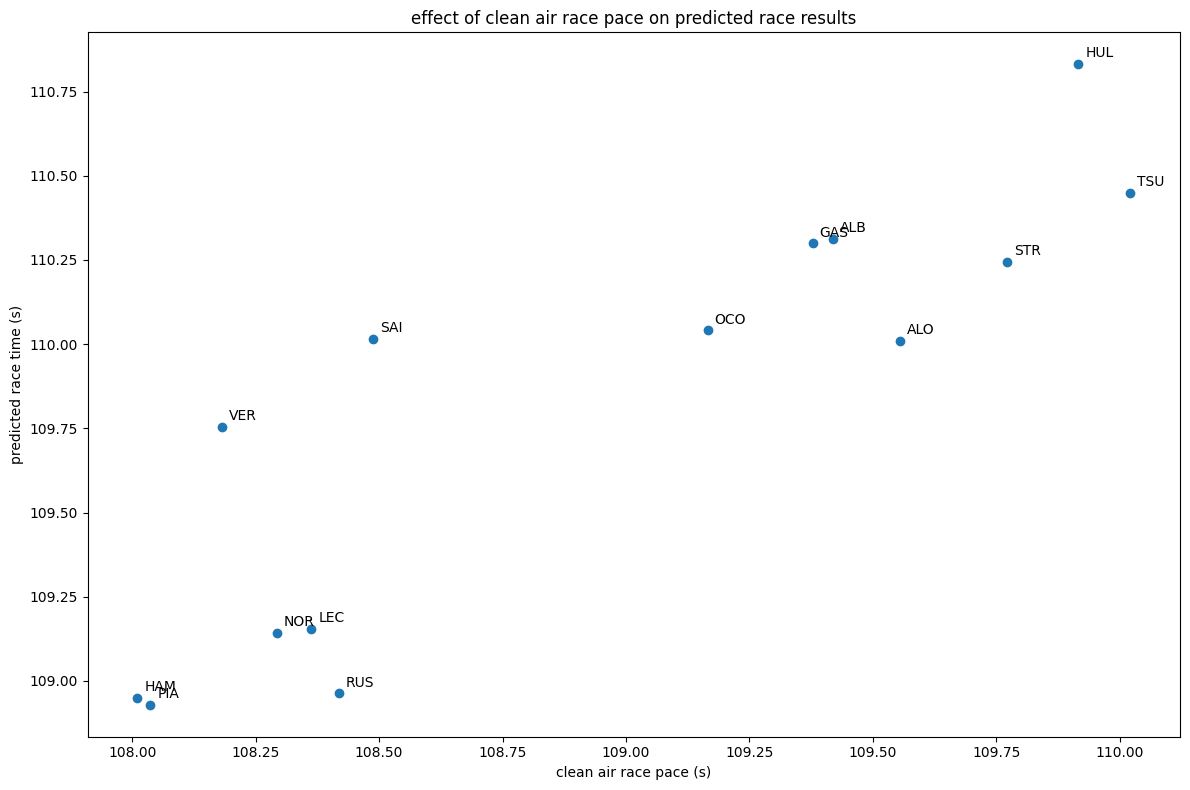

In [38]:
# train gradient boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.7, max_depth=3, random_state=37)
model.fit(x_train, y_train)
model.predict(x_test)
merged_data["PredictedRaceTime (s)"] = model.predict(x_imputed)

# sort the results to find the predicted winner
final_results_1 = merged_data.sort_values("PredictedRaceTime (s)")
print("\n🏁 Predicted 2025 Dutch GP Winner 🏁\n")
print(final_results_1[["Driver", "PredictedRaceTime (s)"]])
y_pred = model.predict(x_test)
print(f"Model Error (MAE): {mean_absolute_error(y_test, y_pred):.2f} seconds")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Model Error (RMSE): {rmse:.2f}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"Model R-squared (R²): {r2:.2f}")


# plot effect of clean air race pace
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(final_results_1["CleanAirRacePace (s)"], final_results_1["PredictedRaceTime (s)"])
for i, driver in enumerate(final_results_1["Driver"]):
    plt.annotate(driver, (final_results_1["CleanAirRacePace (s)"].iloc[i], final_results_1["PredictedRaceTime (s)"].iloc[i]),
                 xytext=(5, 5), textcoords='offset points')
plt.xlabel("clean air race pace (s)")
plt.ylabel("predicted race time (s)")
plt.title("effect of clean air race pace on predicted race results")
plt.tight_layout()
plt.show()


🏁 Predicted 2025 Dutch GP Winner 🏁

   Driver  PredictedRaceTime (s)
18    PIA             108.930534
11    NOR             108.930534
13    HAM             108.950607
4     LEC             109.155418
3     ALO             110.009903
15    SAI             110.012337
0     VER             110.012337
17    RUS             110.016182
10    OCO             110.040474
5     STR             110.242737
1     GAS             110.298615
7     ALB             110.310905
6     TSU             110.404587
8     HUL             110.829346
MAE: 0.6080026645394326
Model Error (MSE): 0.54
Model Error (RMSE): 0.73
Model R-squared (R²): -0.56


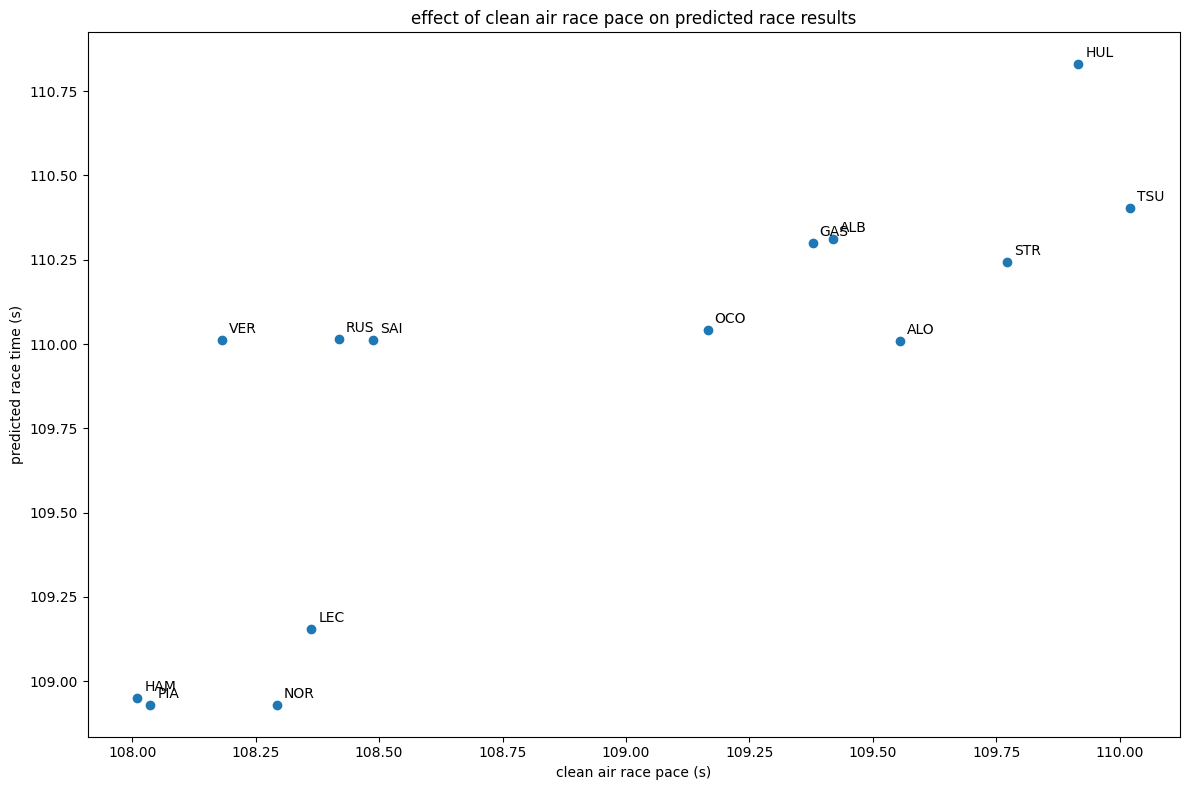

In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Use XGBRegressor for regression tasks
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
merged_data["PredictedRaceTime (s)"] = xgb_model.predict(x_imputed)
final_results_2 = merged_data.sort_values("PredictedRaceTime (s)")
print("\n🏁 Predicted 2025 Dutch GP Winner 🏁\n")
print(final_results_2[["Driver", "PredictedRaceTime (s)"]])
y_pred = xgb_model.predict(x_test)

# Use a regression metric like MAE
print('MAE:', mean_absolute_error(y_test, y_pred))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Model Error (RMSE): {rmse:.2f}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"Model R-squared (R²): {r2:.2f}")

# plot effect of clean air race pace
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(final_results_2["CleanAirRacePace (s)"], final_results_2["PredictedRaceTime (s)"])
for i, driver in enumerate(final_results_2["Driver"]):
    plt.annotate(driver, (final_results_2["CleanAirRacePace (s)"].iloc[i], final_results_2["PredictedRaceTime (s)"].iloc[i]),
                 xytext=(5, 5), textcoords='offset points')
plt.xlabel("clean air race pace (s)")
plt.ylabel("predicted race time (s)")
plt.title("effect of clean air race pace on predicted race results")
plt.tight_layout()
plt.show()


🏁 Predicted 2025 Dutch GP Winner (Random Forest) 🏁

   Driver  PredictedRaceTime (s)
18    PIA             109.064354
11    NOR             109.121685
13    HAM             109.152438
17    RUS             109.200091
4     LEC             109.247462
0     VER             109.499391
15    SAI             109.730747
3     ALO             110.083952
10    OCO             110.108168
5     STR             110.233888
6     TSU             110.246327
7     ALB             110.253492
1     GAS             110.261224
8     HUL             110.580379
MAE: 0.28924776744189556
Model Error (MSE): 0.11
Model Error (RMSE): 0.32
Model R-squared (R²): 0.69


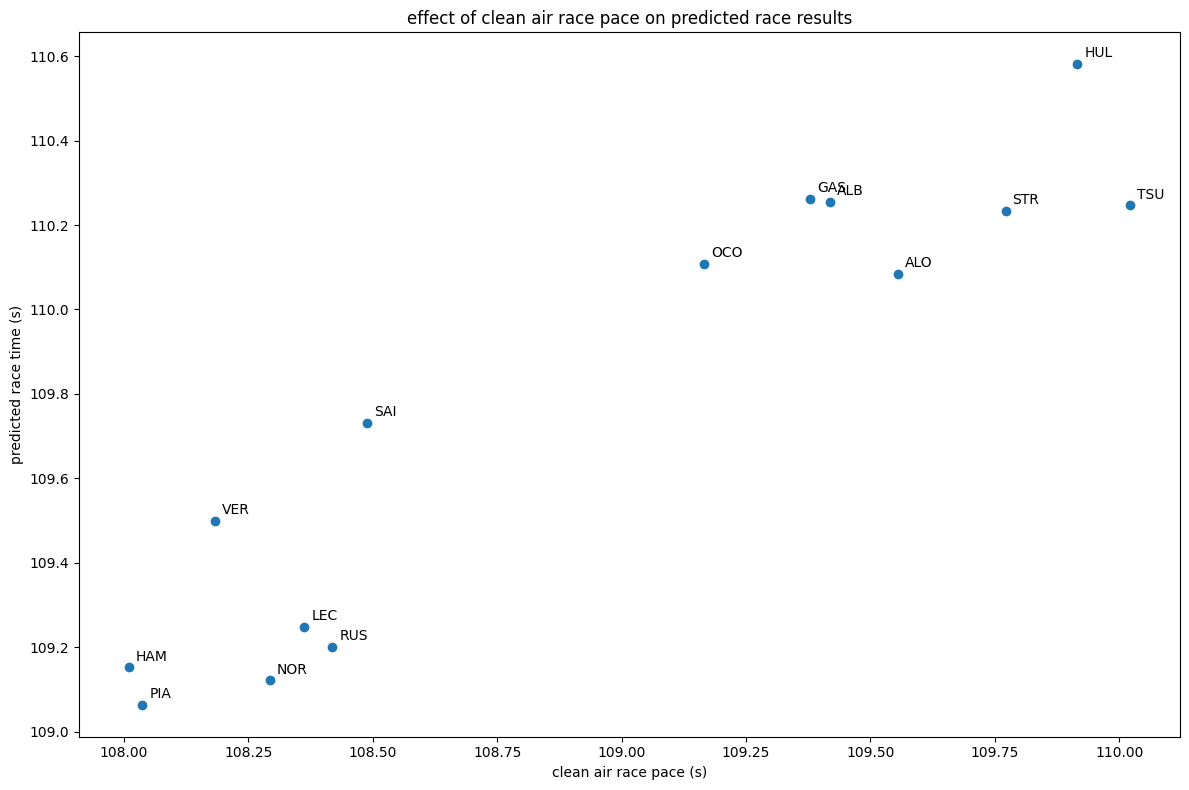

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score # Import other metrics if needed

# Use RandomForestRegressor for regression tasks
rfc_model = RandomForestRegressor(random_state=37) # Added random_state for reproducibility
rfc_model.fit(x_train, y_train)
merged_data["PredictedRaceTime (s)"] = rfc_model.predict(x_imputed) # Predict on the whole dataset

final_results_3 = merged_data.sort_values("PredictedRaceTime (s)")
print("\n🏁 Predicted 2025 Dutch GP Winner (Random Forest) 🏁\n") # Added model name for clarity
print(final_results_3[["Driver", "PredictedRaceTime (s)"]])

# Evaluate the model using regression metrics
y_pred = rfc_model.predict(x_test)

# Use a regression metric like MAE
print('MAE:', mean_absolute_error(y_test, y_pred))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Model Error (RMSE): {rmse:.2f}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"Model R-squared (R²): {r2:.2f}")

# accuracy_score is not suitable for regression
# print('accuracy score:', accuracy_score(y_test,y_pred))

# plot effect of clean air race pace
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(final_results_3["CleanAirRacePace (s)"], final_results_3["PredictedRaceTime (s)"])
for i, driver in enumerate(final_results_3["Driver"]):
    plt.annotate(driver, (final_results_3["CleanAirRacePace (s)"].iloc[i], final_results_3["PredictedRaceTime (s)"].iloc[i]),
                 xytext=(5, 5), textcoords='offset points')
plt.xlabel("clean air race pace (s)")
plt.ylabel("predicted race time (s)")
plt.title("effect of clean air race pace on predicted race results")
plt.tight_layout()
plt.show()

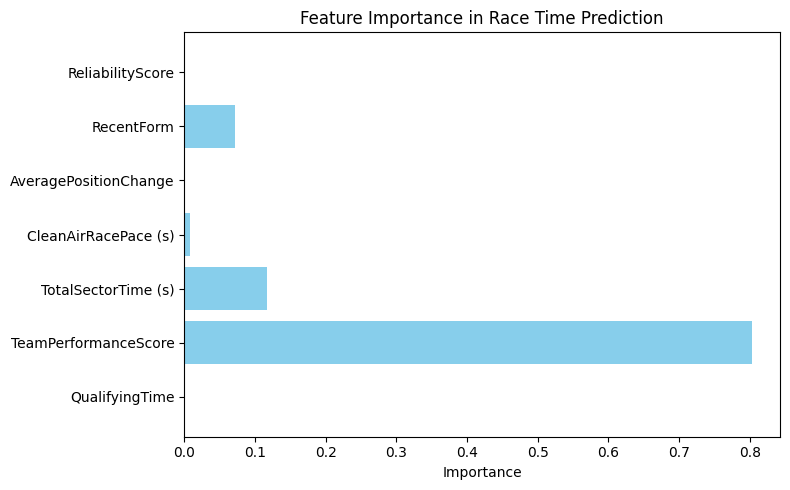

In [41]:
# Plot feature importances
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance in Race Time Prediction")
plt.tight_layout()
plt.show()

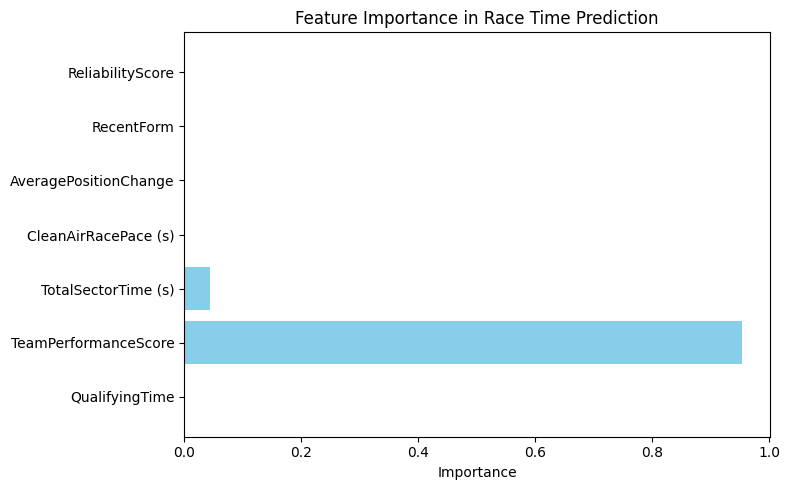

In [42]:
# Plot feature importances
feature_importance = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance in Race Time Prediction")
plt.tight_layout()
plt.show()

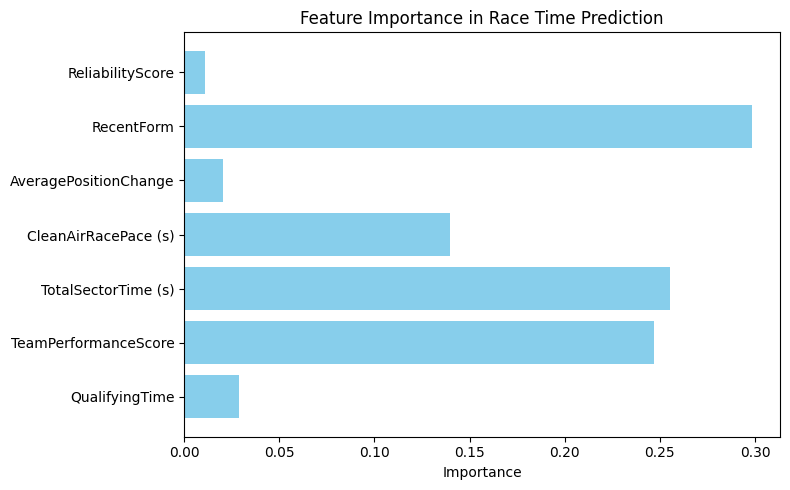

In [43]:
# Plot feature importances
feature_importance = rfc_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance in Race Time Prediction")
plt.tight_layout()
plt.show()

In [44]:
# sort results and get top 3
final_results_3 = merged_data.sort_values("PredictedRaceTime (s)").reset_index(drop=True)
podium = final_results_3.loc[:10, ["Driver", "PredictedRaceTime (s)"]]

print("\n🏆 Predicted in the Top 3 🏆")
print(f"🥇 P1: {podium.iloc[0]['Driver']}")
print(f"🥈 P2: {podium.iloc[1]['Driver']}")
print(f"🥉 P3: {podium.iloc[2]['Driver']}")


🏆 Predicted in the Top 3 🏆
🥇 P1: PIA
🥈 P2: NOR
🥉 P3: HAM
